In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import os

SEED = 321
np.random.seed(SEED)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
sns.set_context('talk', font_scale=0.9)

In [2]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major 
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

In [3]:
df = pd.read_csv("covid_us_county.csv")
display(df.head())
df.info()

,fips,county,state,lat,long,date,cases,state_code,deaths
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017826 entries, 0 to 3017825
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   fips        float64
 1   county      object 
 2   state       object 
 3   lat         float64
 4   long        float64
 5   date        object 
 6   cases       int64  
 7   state_code  object 
 8   deaths      int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 207.2+ MB


In [4]:
df['state_code'].unique()

array(['AL', 'AK', nan, 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [5]:
check = df[df['state_code'].isna()]
check

,fips,county,state,lat,long,date,cases,state_code,deaths
92106,60.0,NaN,American Samoa,-14.2710,-170.1320,2020-01-22,0,NaN,0
92107,60.0,NaN,American Samoa,-14.2710,-170.1320,2020-01-23,0,NaN,0
92108,60.0,NaN,American Samoa,-14.2710,-170.1320,2020-01-24,0,NaN,0
92109,60.0,NaN,American Samoa,-14.2710,-170.1320,2020-01-25,0,NaN,0
92110,60.0,NaN,American Samoa,-14.2710,-170.1320,2020-01-26,0,NaN,0
...,...,...,...,...,...,...,...,...,...
2718025,78.0,NaN,Virgin Islands,18.3358,-64.8963,2022-07-08,21103,NaN,119
2718026,78.0,NaN,Virgin Islands,18.3358,-64.8963,2022-07-09,21103,NaN,119
2718027,78.0,NaN,Virgin Islands,18.3358,-64.8963,2022-07-10,21103,NaN,119
2718028,78.0,NaN,Virgin Islands,18.3358,-64.8963,2022-07-11,21175,NaN,119


In [6]:
check['state'].unique()

array(['American Samoa', 'Diamond Princess', 'District of Columbia',
       'Grand Princess', 'Guam', 'Northern Mariana Islands',
       'Puerto Rico', 'Virgin Islands'], dtype=object)

In [7]:
df.loc[df['state'] == 'American Samoa', 'state_code'] = 'AS'
df.loc[df['state'] == 'District of Columbia', 'state_code'] = 'DC'
df.loc[df['state'] == 'Guam', 'state_code'] = 'GU'
df.loc[df['state'] == 'Northen Mariana Islands', 'state_code'] = 'MP'
df.loc[df['state'] == 'Puerto Rico', 'state_code'] = 'PR'
df.loc[df['state'] == 'Virgin Islands', 'state_code'] = 'VI'
df.loc[(df['state'] == 'Diamond Princess') | (df['state'] == 'Grand Princess'), 'state_code'] = 'CR'

df['state_code'].unique()

array(['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'CR', 'DC',
       'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
       'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH',
       'NJ', 'NM', 'NY', 'NC', 'ND', nan, 'OH', 'OK', 'OR', 'PA', 'PR',
       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV',
       'WI', 'WY'], dtype=object)

In [8]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

,fips,county,state,lat,long,cases,state_code,deaths
date,,,,,,,,
2020-01-22,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
2020-01-23,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
2020-01-24,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
2020-01-25,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
2020-01-26,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
...,...,...,...,...,...,...,...,...
2022-07-08,56045.0,Weston,Wyoming,43.839612,-104.567488,1667,WY,19
2022-07-09,56045.0,Weston,Wyoming,43.839612,-104.567488,1667,WY,19
2022-07-10,56045.0,Weston,Wyoming,43.839612,-104.567488,1667,WY,19


In [9]:
df.drop(columns=['fips','lat','long'], inplace=True)
df.head()

,county,state,cases,state_code,deaths
date,,,,,
2020-01-22,Autauga,Alabama,0,AL,0
2020-01-23,Autauga,Alabama,0,AL,0
2020-01-24,Autauga,Alabama,0,AL,0
2020-01-25,Autauga,Alabama,0,AL,0
2020-01-26,Autauga,Alabama,0,AL,0


In [10]:
state = df.groupby('state_code').resample('D').sum()
state

C:\Users\austi\AppData\Local\Temp\ipykernel_15408\107455030.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state = df.groupby('state_code').resample('D').sum()


cases  deaths
state_code date                      
AK         2020-01-22       0       0
           2020-01-23       0       0
           2020-01-24       0       0
           2020-01-25       0       0
           2020-01-26       0       0
...                       ...     ...
WY         2022-07-08  165619    1834
           2022-07-09  165619    1834
           2022-07-10  165619    1834
           2022-07-11  165619    1834
           2022-07-12  167386    1845

[50568 rows x 2 columns]

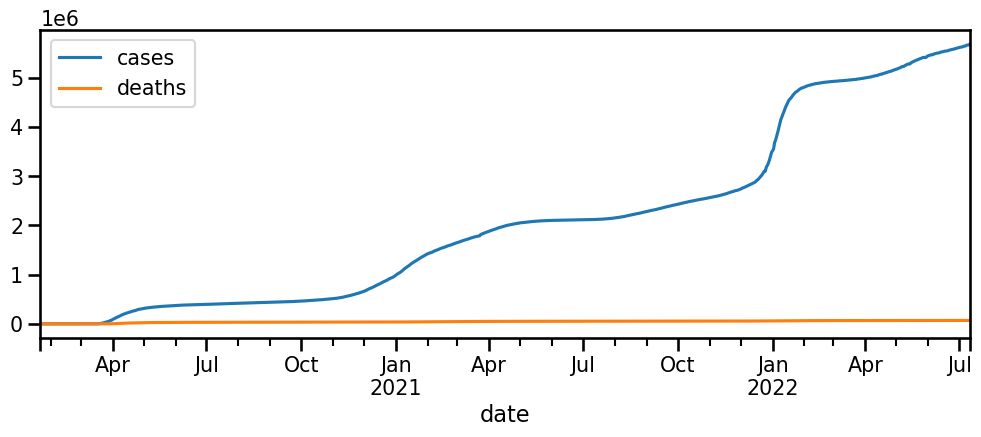

In [11]:
ny = state.loc['NY'].copy()
ny.plot();

Since deaths is so small in comparison to the cases it makes it difficult to see the deaths. To fix this I can use the twin axes

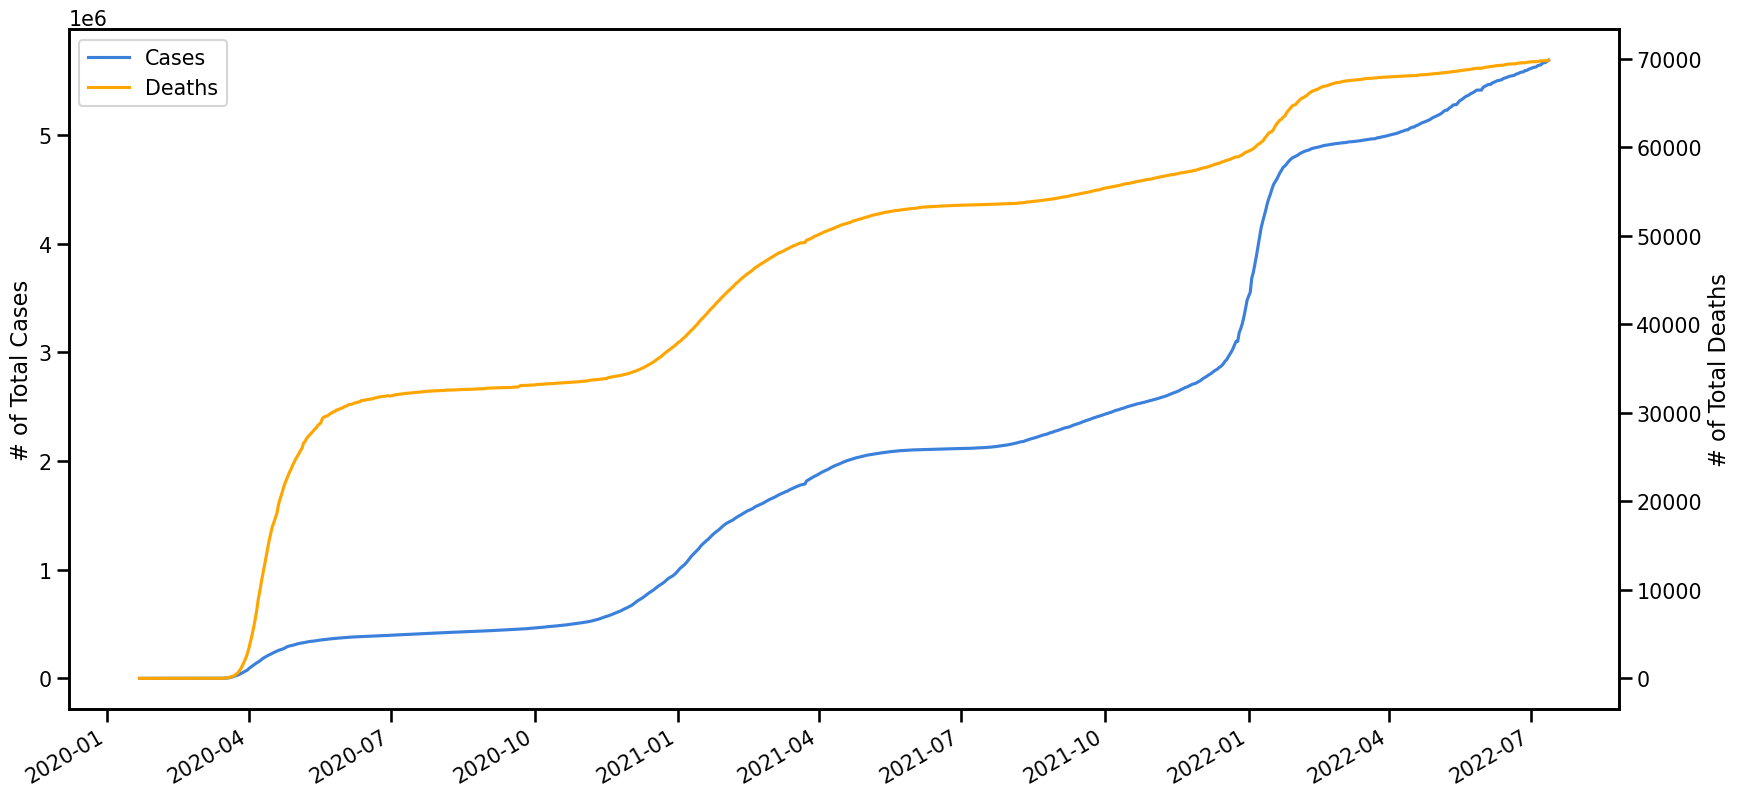

In [12]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(ny.index, ny['cases'], color='#3b81db', label='Cases')
ax1.set(ylabel='# of Total Cases')
ax1.grid(False)
ax2 = ax1.twinx()
ax2.plot(ny.index, ny['deaths'], color='orange', label='Deaths')
ax2.set(ylabel='# of Total Deaths')
ax2.grid(False)

lines = ax1.get_lines() + ax2.get_lines()
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc=0)
fig.autofmt_xdate();

## Creating Custom Function for Plot

In [13]:
def plot_compare_cols(ny,col1='cases',color1='#3b81db',
                      col2='deaths',color2='orange',
                     ylabel1="# of Total Cases", ylabel2="# of Total Deaths",
                     figsize=(12,5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.plot(ny.index, ny[col1] ,color=color1,label=col1.title())
    ax1.set_ylabel(ylabel1)
    ax2 = ax1.twinx()
    ax2.plot(ny.index ,ny[col2],label=col2.title(),color=color2)
    ax2.set_ylabel(ylabel2)
    ax1.grid(False)
    ax2.grid(False)
    lines = ax1.get_lines() + ax2.get_lines()
    labels = [l.get_label() for l in lines]
    ax2.legend(lines, labels, loc=0);
    fig.autofmt_xdate()
    return fig, (ax1,ax2);

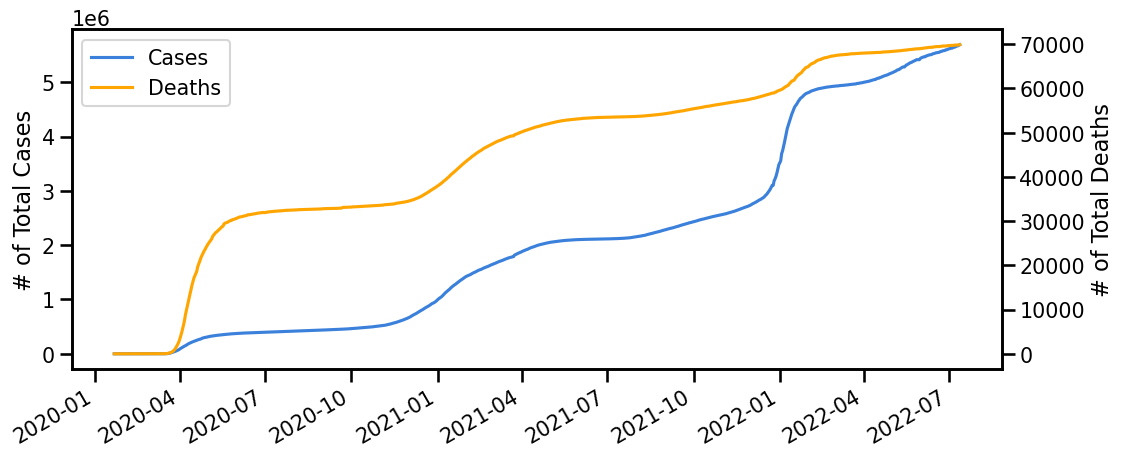

In [14]:
fig, (ax1, ax2) = plot_compare_cols(ny)

In [15]:
import matplotlib.ticker as mticks

In [16]:
strFmt = mticks.StrMethodFormatter('{x:,.0f}')
strFmt

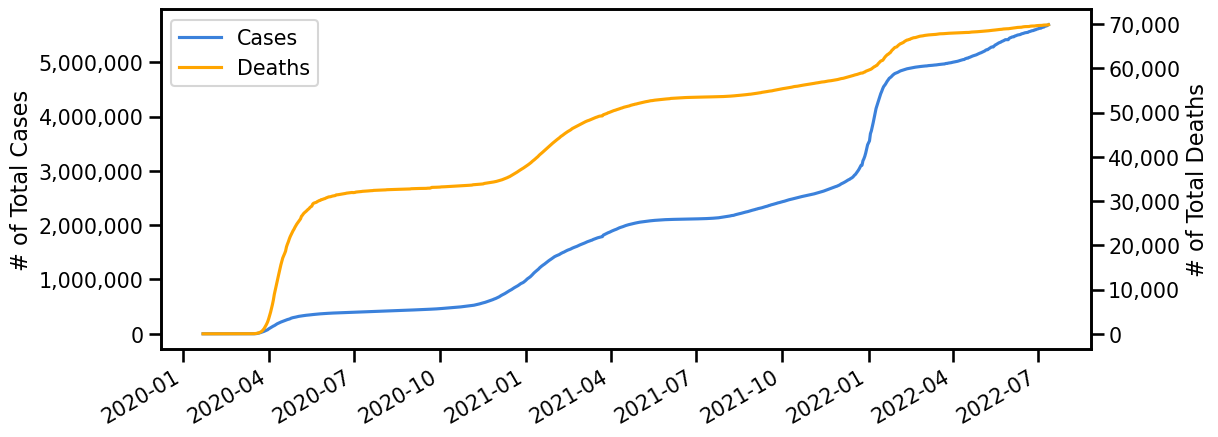

In [17]:
fig, (ax1, ax2) = plot_compare_cols(ny)
ax1.yaxis.set_major_formatter(strFmt)
ax2.yaxis.set_major_formatter(strFmt)

## Fixing the 0's to make it more readable

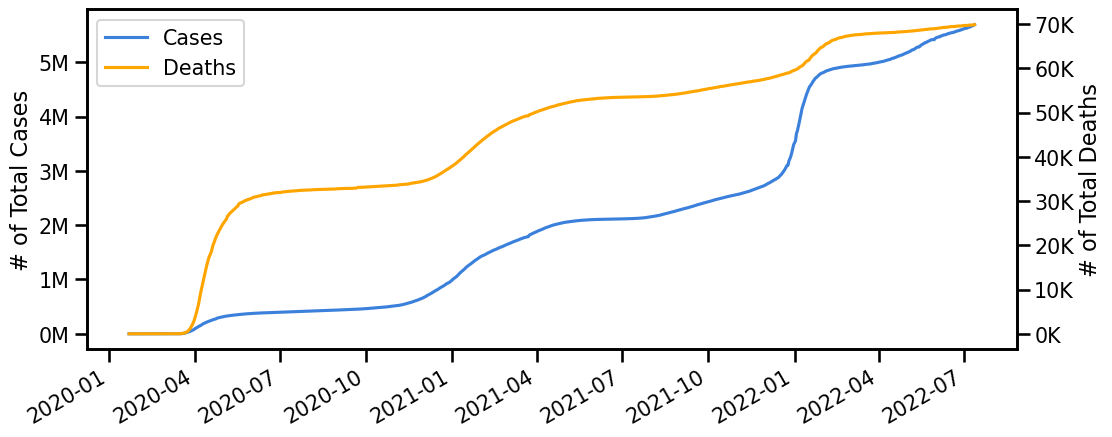

In [18]:
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in thousands"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"

fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)

fig,(ax1,ax2) = plot_compare_cols(ny)

ax1.yaxis.set_major_formatter(fmt_mill)
ax2.yaxis.set_major_formatter(fmt_thous)

## Adding Date Formating to Tick Formating

In [19]:
threeMon = mdates.MonthLocator(interval=3)
monFmt = mdates.DateFormatter('%b')
year = mdates.YearLocator()
yrFmt = mdates.DateFormatter('%Y')

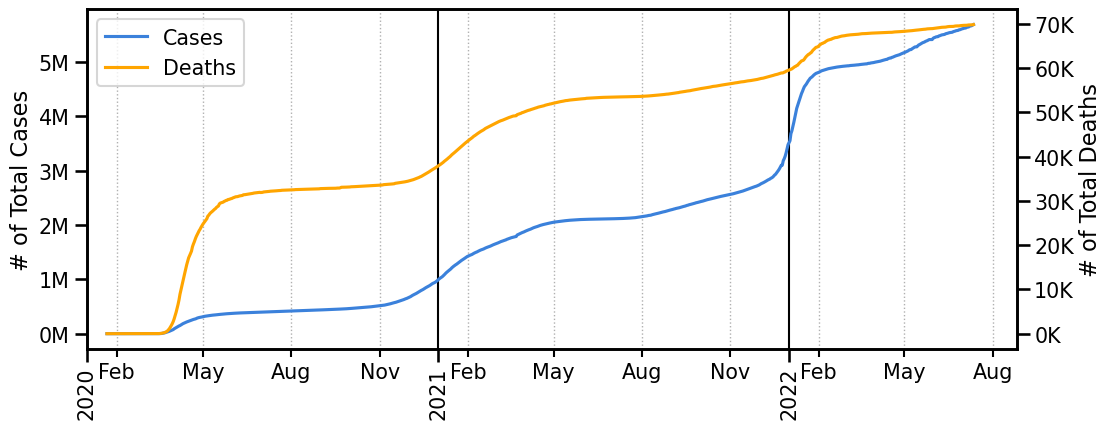

In [20]:
fig, (ax1, ax2) = plot_compare_cols(ny)
ax1.set_xlim(left=pd.to_datetime('01/2020'))
ax1.yaxis.set_major_formatter(fmt_mill)
ax2.yaxis.set_major_formatter(fmt_thous)
ax1.xaxis.set_minor_locator(threeMon)
ax1.xaxis.set_minor_formatter(monFmt)
ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(yrFmt)
ax1.grid(which='minor', axis='x',ls=':',lw=1)
ax1.grid(which='major', axis='x',color='k')
fig.autofmt_xdate(which='major', rotation=90, ha='center'); 

## Converting Cumulative Values to Delta

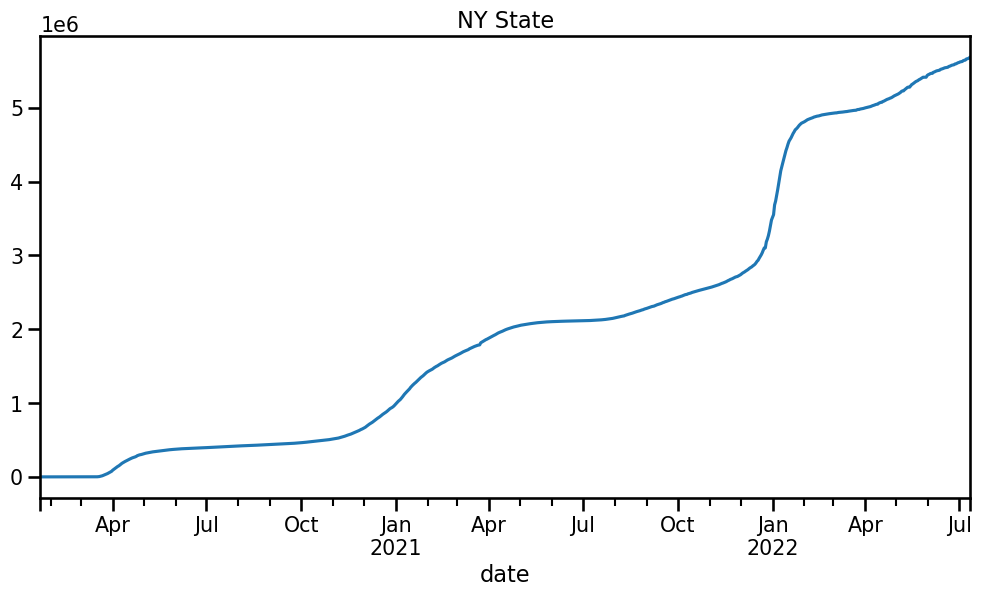

In [28]:
state_code = "NY"
state_ts = state.loc[state_code].copy()
axes = state_ts['cases'].plot(figsize=(12,6),title=f"{state_code} State")

In [29]:
diffDF = state_ts.diff()
diffDF

,cases,deaths
date,,
2020-01-22,NaN,NaN
2020-01-23,0.0,0.0
2020-01-24,0.0,0.0
2020-01-25,0.0,0.0
2020-01-26,0.0,0.0
...,...,...
2022-07-08,15343.0,14.0
2022-07-09,4025.0,0.0
2022-07-10,3260.0,0.0


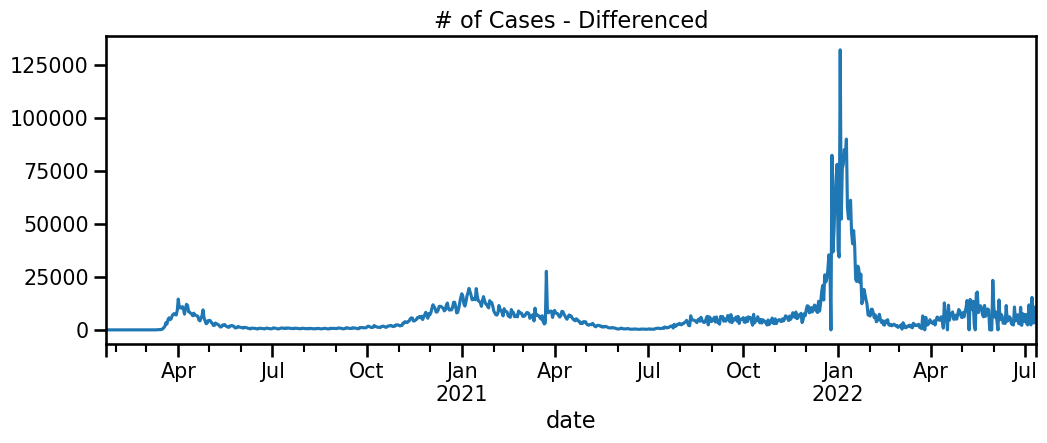

In [31]:
ax = diffDF['cases'].plot(title='# of Cases - Differenced');

# Plotting Sum Diff and Original Data

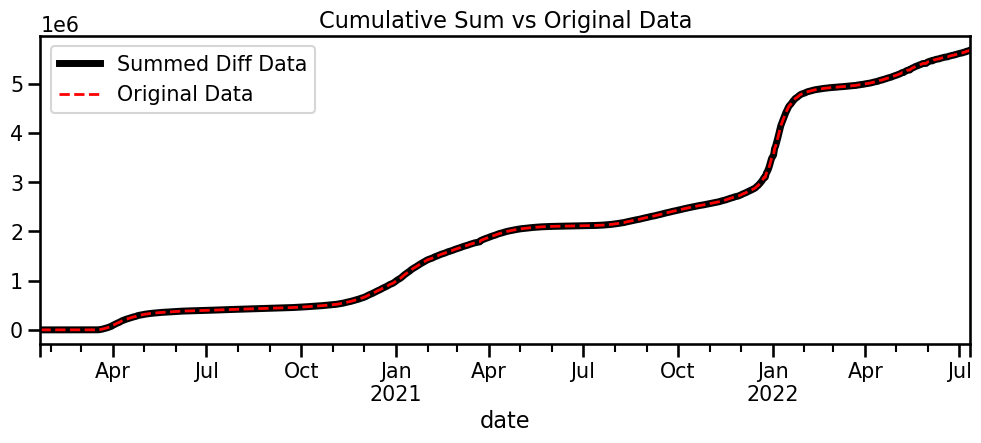

In [33]:
cumSum = diffDF.cumsum()
ax = cumSum['cases'].plot(title='Cumulative Sum vs Original Data',
                          label='Summed Diff Data',color='black',lw=5)
state_ts['cases'].plot(ax=ax,label='Original Data',color='red',lw=2,ls='--')
ax.legend();

## Plotting Rolling Stats

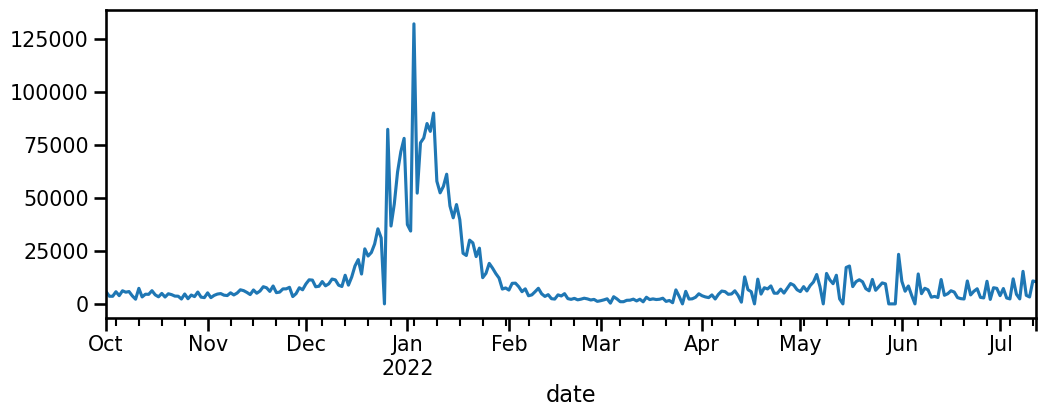

In [34]:
rollStats = diffDF.loc['10/2021':'7/2022','cases'].copy().dropna()
rollStats.plot();

In [36]:
timeWindow = 7
meanStats = rollStats.rolling(timeWindow).mean()
meanStats

date
2021-10-01            NaN
2021-10-02            NaN
2021-10-03            NaN
2021-10-04            NaN
2021-10-05            NaN
                 ...     
2022-07-08    6626.285714
2022-07-09    6168.142857
2022-07-10    6234.428571
2022-07-11    7443.857143
2022-07-12    7248.142857
Freq: D, Name: cases, Length: 285, dtype: float64

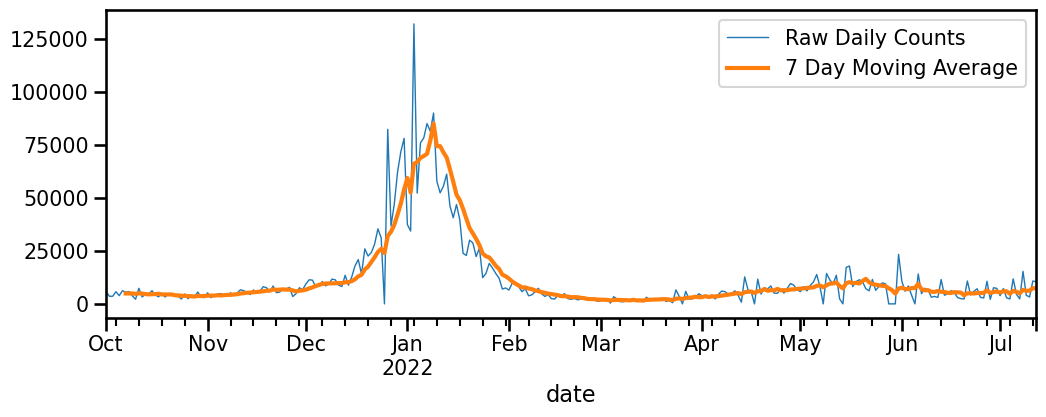

In [38]:
ax = rollStats.plot(label='Raw Daily Counts',lw=1)
meanStats.plot(label=f'{timeWindow} Day Moving Average', ax=ax, lw=3)
ax.legend();

## Plotting Standard Deviation

In [39]:
stdDF = rollStats.rolling(timeWindow).std()
stdDF

date
2021-10-01            NaN
2021-10-02            NaN
2021-10-03            NaN
2021-10-04            NaN
2021-10-05            NaN
                 ...     
2022-07-08    5143.954015
2022-07-09    5223.219168
2022-07-10    5176.023276
2022-07-11    5103.509166
2022-07-12    4932.231997
Freq: D, Name: cases, Length: 285, dtype: float64

In [41]:
stdStats = pd.DataFrame({'mean':meanStats,
                         'mean+std':meanStats+stdDF,
                         'mean-std':meanStats-stdDF})
stdStats = stdStats.dropna()
stdStats

,mean,mean+std,mean-std
date,,,
2021-10-07,4897.571429,6043.555265,3751.587593
2021-10-08,4905.142857,6057.936916,3752.348798
2021-10-09,4928.857143,6051.743666,3805.970620
2021-10-10,4731.142857,6198.013270,3264.272444
2021-10-11,4958.714286,6703.903455,3213.525116
...,...,...,...
2022-07-08,6626.285714,11770.239729,1482.331700
2022-07-09,6168.142857,11391.362025,944.923689
2022-07-10,6234.428571,11410.451847,1058.405296


## Plotting Rolling Mean +/- std Mean

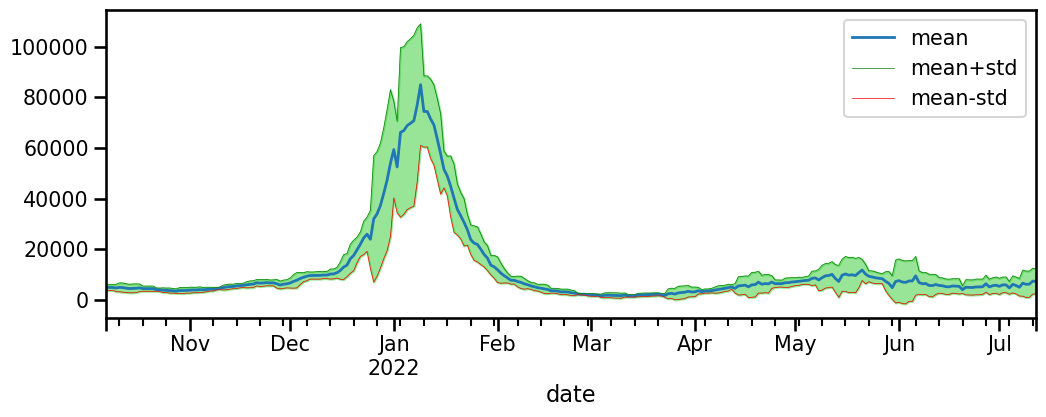

In [51]:
ax = stdStats.plot(y='mean',lw=2)
stdStats.plot(y='mean+std',color='g',lw=0.5,ax=ax)
stdStats.plot(y='mean-std',color='r',lw=0.5,ax=ax)
ax.fill_between(stdStats.index, stdStats['mean+std'], stdStats['mean-std'], color='limegreen', alpha=0.5, 
                label='mean+/-std', zorder=0);